# 🎯 **Phase 1: Find the Target Market**

## **Problem statement**

Identify and profile the most promising customer segments using available demographic and financial data.

## **Import Libraries and datasets**

In [ ]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load customer table
df_cust = pd.read_csv("customers.csv")
df_cust.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married


In [ ]:
# load credit profiles table
df_cs = pd.read_csv("credit_profiles.csv")
df_cs.head(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0


In [ ]:
# load transactions table
df_trans = pd.read_csv("transactions.csv")
df_trans.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe


## **Understanding the datasets**

In [ ]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [ ]:
df_cs.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [ ]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


## **Data Cleaning: df_cust**

In [ ]:
# checking null values
df_cust.isnull().sum()

,0
cust_id,0
name,0
gender,0
age,0
location,0
occupation,0
annual_income,50
marital_status,0


In [ ]:
df_cust[df_cust['annual_income'].isna()].head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married


**Approach to Handling Missing Annual Income Values**:
We impute missing values in the ```annual_income``` column using the median income specific to each occupation group. This method assumes that customers sharing the same occupation tend to have similar income levels, making the occupation-wise median a reliable estimate for filling null values.

In [ ]:
# finding median income for occupation
occupation_wise_median_income = df_cust.groupby('occupation')['annual_income'].median()
occupation_wise_median_income

,annual_income
occupation,
Accountant,65265.0
Artist,45794.0
Business Owner,261191.5
Consultant,58017.0
Data Scientist,135759.0
Freelancer,46759.0
Fullstack Developer,76774.0


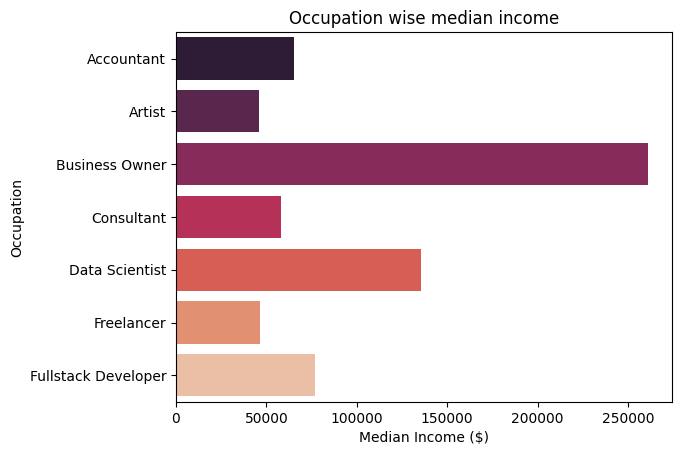

In [ ]:
# visualization of median income for each occupation
sns.barplot(x=occupation_wise_median_income.values, y=occupation_wise_median_income.index, palette='rocket')
plt.title('Occupation wise median income')
plt.xlabel('Median Income ($)')
plt.ylabel('Occupation')
plt.show()

In [ ]:
# function to replace null annual income with median income by occupation
def get_median_val(row):
  if pd.isnull(row['annual_income']):
    return occupation_wise_median_income[row['occupation']]
  else:
    return row['annual_income']

In [ ]:
# replace null annual income with median income by occupation
df_cust['annual_income'] = df_cust.apply(
    lambda row: get_median_val(row),
    axis=1
)

In [ ]:
# checking the output
df_cust.iloc[[14, 82, 97]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,261191.5,Married


To treat outliers in the ```df_cust``` table, we analyze the summary statistics provided by the ```describe()``` function to identify and handle anomalous values.

In [ ]:
# get df_cust stats summary
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


**Insights**: The minimum age is 1 and the maximum age is 135, which are both unrealistic values and likely outliers. Similarly, the annual income ranges from 2 to 449,346, where the minimum value seems unusually low and the maximum excessively high, indicating potential outliers in the data.

In [ ]:
# filtering customers with less than $100 annual income
df_cust[df_cust['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [ ]:
# replacing annual income less than 100 with median income
for index, row in df_cust.iterrows():
  if row['annual_income'] < 100:
    df_cust.at[index, 'annual_income'] = occupation_wise_median_income[row['occupation']]

In [ ]:
# checking the output
df_cust.iloc[[31, 262]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,261191.5,Married


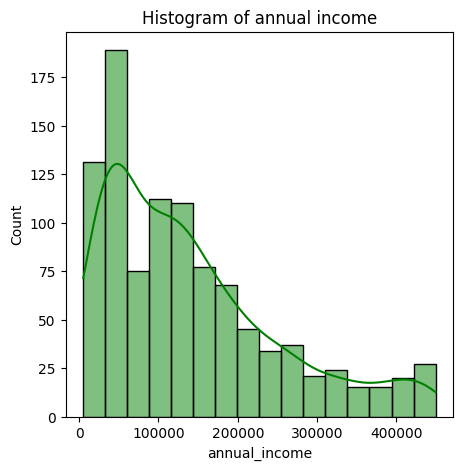

In [ ]:
# visualizing the annual income after outlier treatment
plt.figure(figsize=(5, 5))
sns.histplot(df_cust['annual_income'], kde=True, color='green', label='Data')
plt.title('Histogram of annual income')
plt.show()

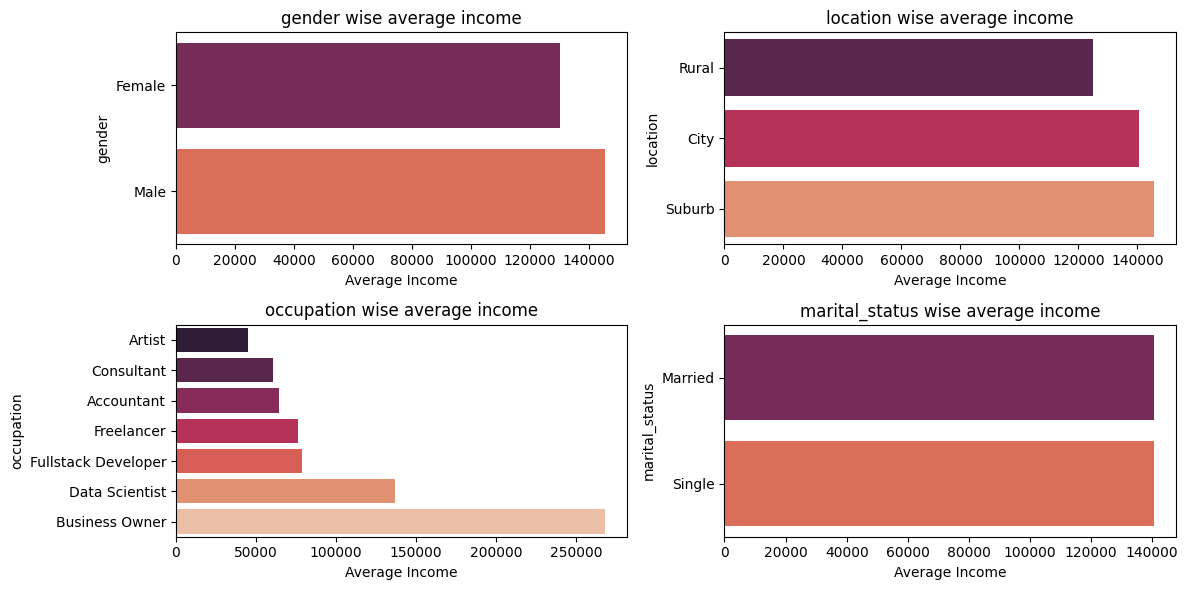

In [ ]:
# Plot average annual income by categories for selected categorical variables
categorical_cols = ['gender', 'location', 'occupation', 'marital_status']

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()  # Flatten 2D array to 1D for easy indexing

for i, col in enumerate(categorical_cols):
    avg_income = df_cust.groupby(col)['annual_income'].mean().sort_values()

    sns.barplot(x=avg_income.values, y=avg_income.index, palette='rocket', ax=axes[i])
    axes[i].set_title(f'{col} wise average income')
    axes[i].set_xlabel("Average Income")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


**Insights from Average Income Analysis**

*Gender Analysis*
- **Male** average income is significantly higher than **Female** average income.
- The disparity suggests potential gender-based income inequality in the dataset.

*Occupation Analysis*
- **Business Owners** and **Data Scientists** have the highest average incomes, exceeding other professions by a large margin.
- **Fullstack Developers** also earn notably high incomes, followed by **Accountants**.
- **Artists** and **Freelancers** have the lowest average incomes among the listed occupations.

*Location Analysis*
- **City** dwellers have the highest average income, followed by those in **Suburbs**.
- **Rural** areas report the lowest average income, indicating a possible urban-rural income divide.

*Marital Status Analysis*
- **Married** individuals have a higher average income compared to **Single** individuals.
- This could imply that marital status may influence earning potential, possibly due to dual incomes or other socioeconomic factors.

*General Observations*
- Income disparities are evident across all categories (gender, occupation, location, marital status).
- The highest earners are concentrated in specific professions (Business Owners, Data Scientists) and locations (Cities).

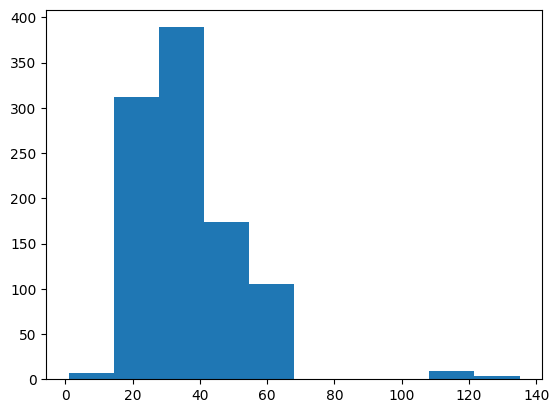

In [ ]:
# visualizing age column using histogram
plt.hist(df_cust['age'])
plt.show()

In [ ]:
# filtering outliers
age_outliers = df_cust[(df_cust['age'] > 80) | (df_cust['age'] < 18)]
age_outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [ ]:
# creating occupation wise median age
occupation_wise_median_age = df_cust.groupby('occupation')['age'].median()
occupation_wise_median_age

,age
occupation,
Accountant,31.5
Artist,26.0
Business Owner,51.0
Consultant,46.0
Data Scientist,32.0
Freelancer,24.0
Fullstack Developer,27.5


In [ ]:
# replace outlier ages with median age by occupation
for index, row in age_outliers.iterrows():
  df_cust.at[index, 'age'] = occupation_wise_median_age[row['occupation']]

df_cust['age'].describe()

,age
count,1000.000000
mean,35.541500
std,12.276634
min,18.000000
25%,26.000000
50%,32.000000
75%,44.250000
max,64.000000


In [ ]:
# adding new age group column for analysis
bin_edges = [17, 25, 48, 65]
bin_labels = ['18-25', '26-48', '49-65']
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)
df_cust.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25


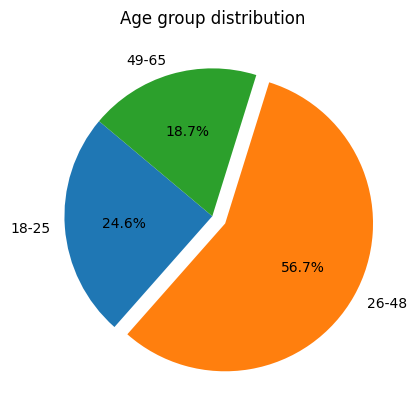

In [ ]:
# visualizing age group distribuiton
age_group_counts = df_cust['age_group'].value_counts(normalize=True).sort_index()*100
plt.pie(
    age_group_counts,
    labels=age_group_counts.index,
    autopct='%1.1f%%',
    explode=(0,0.1,0),
    startangle=140
)
plt.title('Age group distribution')
plt.show()

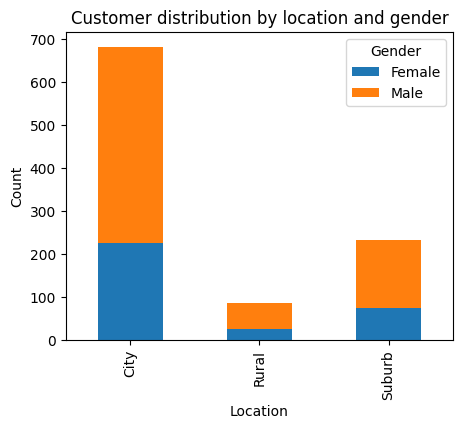

In [ ]:
# visualizing customer distribution
customer_location_gender = df_cust.groupby(['location', 'gender']).size().unstack()
customer_location_gender.plot(kind='bar', stacked=True, figsize=(5,4))
plt.title('Customer distribution by location and gender')
plt.legend(title='Gender')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

## **Data cleaning: df_cs**

In [ ]:
df_cs.head(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0


In [ ]:
df_cs.shape

(1004, 6)

In [ ]:
df_cust.shape

(1000, 9)

**Insights**: df_cs table have more rows than df_cust table. Mostly because of duplicate data points.

In [ ]:
# filtering duplicate data
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [ ]:
# removing the duplicate rows
df_cs_clean = df_cs.drop_duplicates(subset='cust_id', keep='last')

# checking again the duplicate rows
df_cs_clean[df_cs_clean['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [ ]:
# checking null values
df_cs_clean.isnull().sum()

,0
cust_id,0
credit_score,0
credit_utilisation,0
outstanding_debt,0
credit_inquiries_last_6_months,0
credit_limit,65


**Insight**: Credit limit has null values. Further analysis we can find the relationship between credit score and credit limit to fill null values.

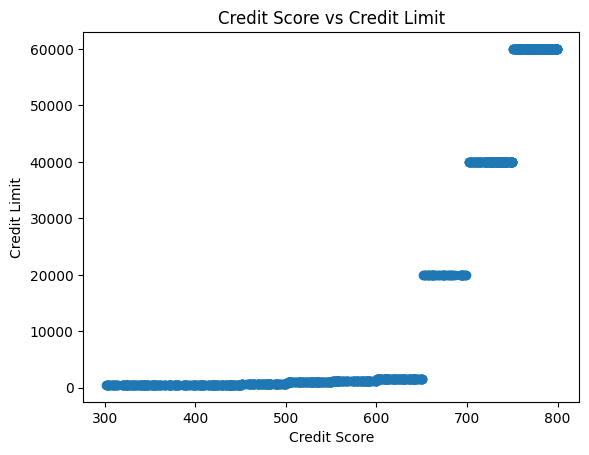

In [ ]:
# create scatter plot to find the relationship between credit limit and credit score
plt.scatter(df_cs_clean['credit_score'], df_cs_clean['credit_limit'])
plt.xlabel('Credit Score')
plt.ylabel('Credit Limit')
plt.title('Credit Score vs Credit Limit')
plt.show()

**Approach for outlier treatment**: In the scatter plot we can see that credit limit is closely associated with credit score. Here we can find median credit limit using credit score and replace null credit limit values.

In [ ]:
# Bin credit scores into predefined ranges and label them (e.g., '300-449', '450-499', etc.)
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges[:-1], bin_ranges[1:])]
df_cs_clean['credit_score_range'] = pd.cut(df_cs_clean['credit_score'], bins=bin_ranges, labels=bin_labels)
df_cs_clean.head(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549


In [ ]:
# finding the most occuring credit limit for each credit score range
mode_df = df_cs_clean.groupby(['credit_score_range'])['credit_limit'].agg(lambda x: x.mode().iloc[0])
mode_df

,credit_limit
credit_score_range,
300-449,500.0
450-499,750.0
500-549,1000.0
550-599,1250.0
600-649,1500.0
650-699,20000.0
700-749,40000.0
750-799,60000.0


In [ ]:
# merging df_cs_clean and mode_df
df_cs_clean_2 = pd.merge(df_cs_clean, mode_df, on='credit_score_range', how='left', suffixes=("", "_mode"))
df_cs_clean_2.head(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0


In [ ]:
# filling null values with mode
df_cs_clean_3 = df_cs_clean_2.copy()
df_cs_clean_3['credit_limit'].fillna(df_cs_clean_3['credit_limit_mode'], inplace=True)
df_cs_clean_3.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
378,379,562,0.479204,482.0,1.0,1250.0,550-599,1250.0
546,547,397,0.613860,244.0,2.0,500.0,300-449,500.0
62,63,344,0.444594,182.0,2.0,500.0,300-449,500.0


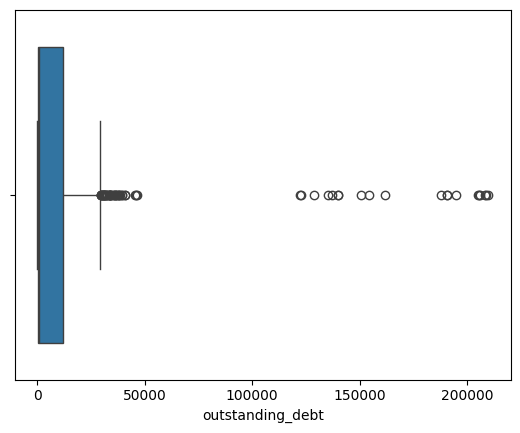

In [ ]:
# using boxplot to find outliers in outstanding debt
sns.boxplot(x=df_cs_clean_3['outstanding_debt'])
plt.show()

**Approach to handle outliers**: we are using business model. Outstanding debt cannot be more than credit limit

In [ ]:
# finding outstanding debt more than credit limit
df_cs_clean_3[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [ ]:
# if outstanding debt is more than credit limit, then replace with credit limit
df_cs_clean_3.loc[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit'], 'outstanding_debt'] = df_cs_clean_3['credit_limit']

In [ ]:
# checking the output
df_cs_clean_3[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [ ]:
# merging df_cust and df_cs
df_merged = df_cust.merge(df_cs_clean_3, on='cust_id', how='inner')
df_merged.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0


In [ ]:
# finding correlation between variables
numerical_cols = ['credit_score', 'age', 'annual_income', 'credit_limit', 'outstanding_debt', 'credit_utilisation', 'credit_inquiries_last_6_months']
correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,age,annual_income,credit_limit,outstanding_debt,credit_utilisation,credit_inquiries_last_6_months
credit_score,1.000000,0.444917,0.575751,0.848261,0.680654,-0.070445,-0.001226
age,0.444917,1.000000,0.619037,0.512087,0.444301,-0.027713,-0.025831
annual_income,0.575751,0.619037,1.000000,0.684653,0.555661,-0.086368,0.002747
credit_limit,0.848261,0.512087,0.684653,1.000000,0.810502,-0.079631,0.014197
outstanding_debt,0.680654,0.444301,0.555661,0.810502,1.000000,0.192838,0.019793
credit_utilisation,-0.070445,-0.027713,-0.086368,-0.079631,0.192838,1.000000,-0.013952
credit_inquiries_last_6_months,-0.001226,-0.025831,0.002747,0.014197,0.019793,-0.013952,1.000000


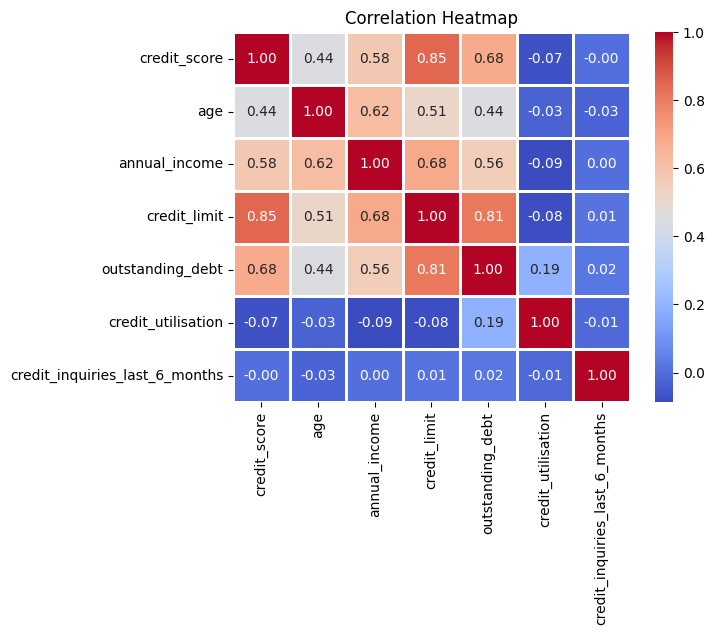

In [ ]:
# heatmap for correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.9)
plt.title('Correlation Heatmap')
plt.show()

## **Data Cleaning: df_trans**



In [ ]:
df_trans.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe


In [ ]:
df_trans.shape

(500000, 7)

In [ ]:
# checking null values
df_trans.isnull().sum()

,0
tran_id,0
cust_id,0
tran_date,0
tran_amount,0
platform,4941
product_category,0
payment_type,0


**Approach to handle null values**: Since platform is a categorical column replace with mode.

In [ ]:
# unique platforms
df_trans['platform'].unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

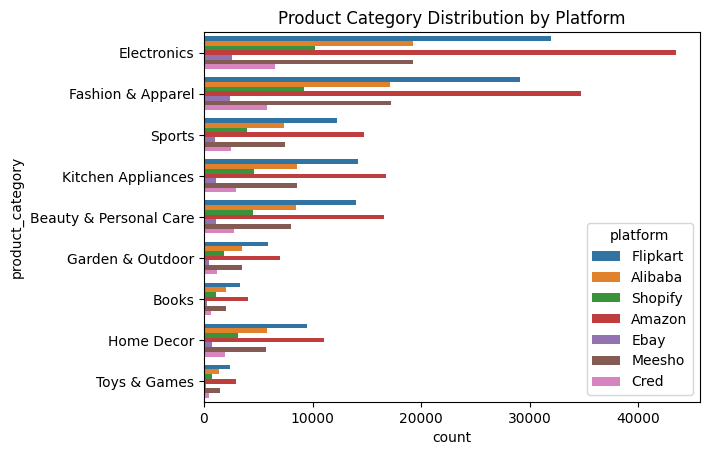

In [ ]:
# visualize product category distribution by platform
sns.countplot(data=df_trans, y='product_category', hue='platform')
plt.title('Product Category Distribution by Platform')
plt.show()

**Insights**: In every category Amazon is the most occuring platform. so we can take Amazon directly to replace null values

In [ ]:
# replace null platform values with Amazon
df_trans['platform'].fillna(df_trans.platform.mode()[0], inplace=True)

# checking null values
df_trans.isnull().sum()

,0
tran_id,0
cust_id,0
tran_date,0
tran_amount,0
platform,0
product_category,0
payment_type,0


In [ ]:
# transaction table stats
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


**Insights**: min amount in tran_amount is 0. That can't be possible

In [ ]:
# filtering df_tran having tran_amount 0
df_trans_zero = df_trans[df_trans['tran_amount'] == 0]

# check dimensions
df_trans_zero.shape

(4734, 7)

In [ ]:
df_trans_zero.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card


In [ ]:
# group by platform, product category, and payment type
df_trans_zero[['platform', 'product_category', 'payment_type']].value_counts().reset_index()

,platform,product_category,payment_type,count
0,Amazon,Electronics,Credit Card,4734


**Insights**: All transactions have zero tran_amount are from electronics bought from Amazon using credit card.

In [ ]:
# filtering df_trans bought electronics from Amazon using credit card
df_trans_1 = df_trans[(df_trans['platform']=='Amazon') & (df_trans['product_category']=='Electronics') & (df_trans['payment_type']=='Credit Card')]
df_trans_1.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card


In [ ]:
# finding median
median_to_replace = df_trans_1[df_trans_1['tran_amount']>0].tran_amount.median()
median_to_replace

554.0

In [ ]:
# replacing 0 with median
df_trans['tran_amount'].replace(0, median_to_replace, inplace=True)

In [ ]:
# checking df_trans stats again
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711634,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


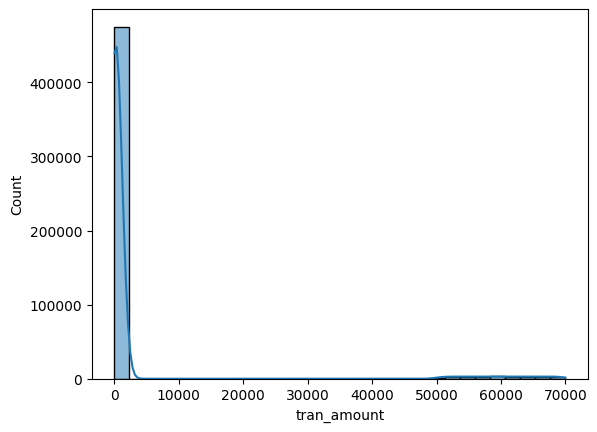

In [ ]:
# visualising tran_amount for finding outliers
sns.histplot(df_trans['tran_amount'], kde=True, label='Data', bins=30)
plt.show()

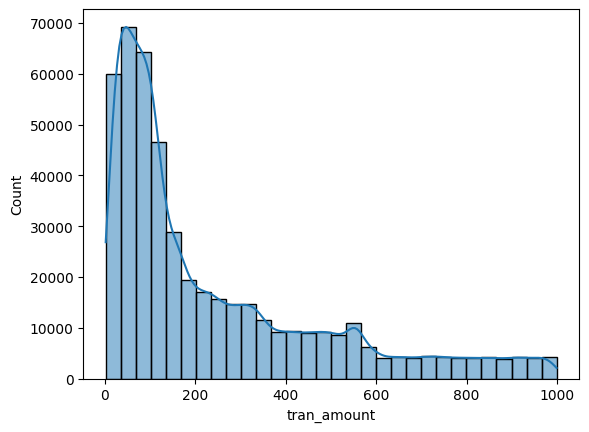

In [ ]:
sns.histplot(df_trans[df_trans['tran_amount']<10000].tran_amount, kde=True, label='Data', bins=30)
plt.show()

**Insights**: Since it is right skewed distribution we are using IQR to remove outlier.

In [ ]:
# finding lower and upper bound using IQR
Q1, Q3 = df_trans['tran_amount'].quantile([0.25, 0.75])

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper

(-454.5, 933.5)

In [ ]:
# filtering outliers
df_trans_outliers = df_trans[df_trans['tran_amount']>=upper]
df_trans_outliers.shape

(33225, 7)

In [ ]:
# filtering transactions without outliers
df_trans_normal = df_trans[df_trans['tran_amount']<upper]
df_trans_normal.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe


In [ ]:
# finding average transaction per each category
tran_mean_per_category = df_trans_normal.groupby('product_category')['tran_amount'].mean()
tran_mean_per_category

,tran_amount
product_category,
Beauty & Personal Care,92.167205
Books,29.553515
Electronics,478.776125
Fashion & Apparel,64.553463
Garden & Outdoor,125.630277
Home Decor,302.487561
Kitchen Appliances,176.773288
Sports,269.181631
Toys & Games,50.333298


In [ ]:
# replacing outliers with mean
df_trans.loc[df_trans_outliers.index, 'tran_amount'] = df_trans_outliers['product_category'].map(tran_mean_per_category)

In [ ]:
# checking output
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
19,20,70,2023-01-01,478.776125,Meesho,Electronics,Phonepe
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
48,49,532,2023-01-01,478.776125,Flipkart,Electronics,Debit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499921,499922,492,2023-09-05,478.776125,Amazon,Electronics,Gpay
499930,499931,365,2023-09-05,478.776125,Alibaba,Electronics,Net Banking
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay
499993,499994,820,2023-09-05,478.776125,Meesho,Electronics,Gpay


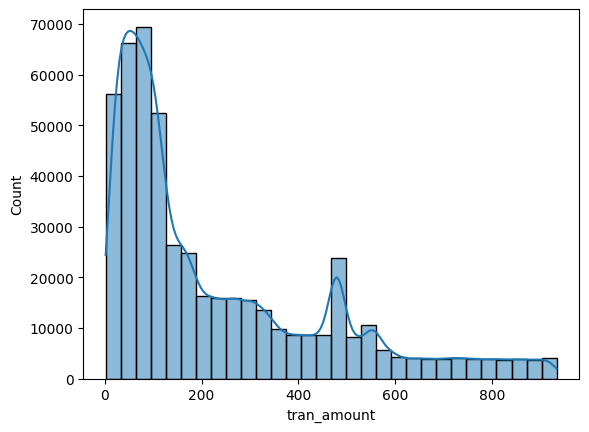

In [ ]:
# checking distribution after outlier treatment
sns.histplot(df_trans['tran_amount'], kde=True, bins=30)
plt.show()

In [ ]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


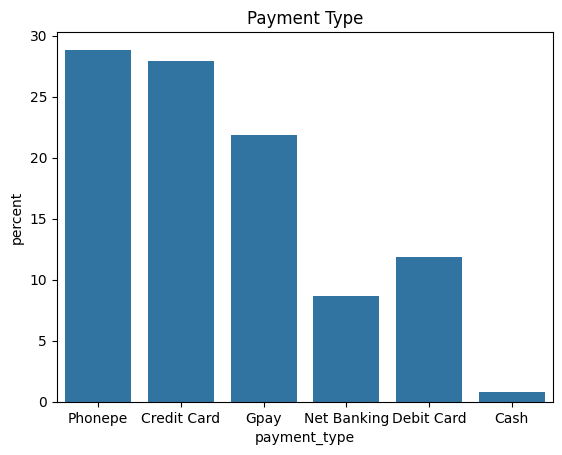

In [ ]:
# payment type percentages
sns.countplot(data=df_trans, x='payment_type', stat='percent')
plt.title('Payment Type')
plt.show()

In [ ]:
# merge datasets
df_trans_merged = df_trans.merge(df_cust, on='cust_id', how='inner')
df_trans_merged.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe,Kriti Jain,Female,22.0,City,Fullstack Developer,47403.0,Married,18-25
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card,Pranav Singhal,Male,35.0,City,Data Scientist,137381.0,Single,26-48
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe,Kunal Patel,Male,24.0,City,Freelancer,51629.0,Married,18-25


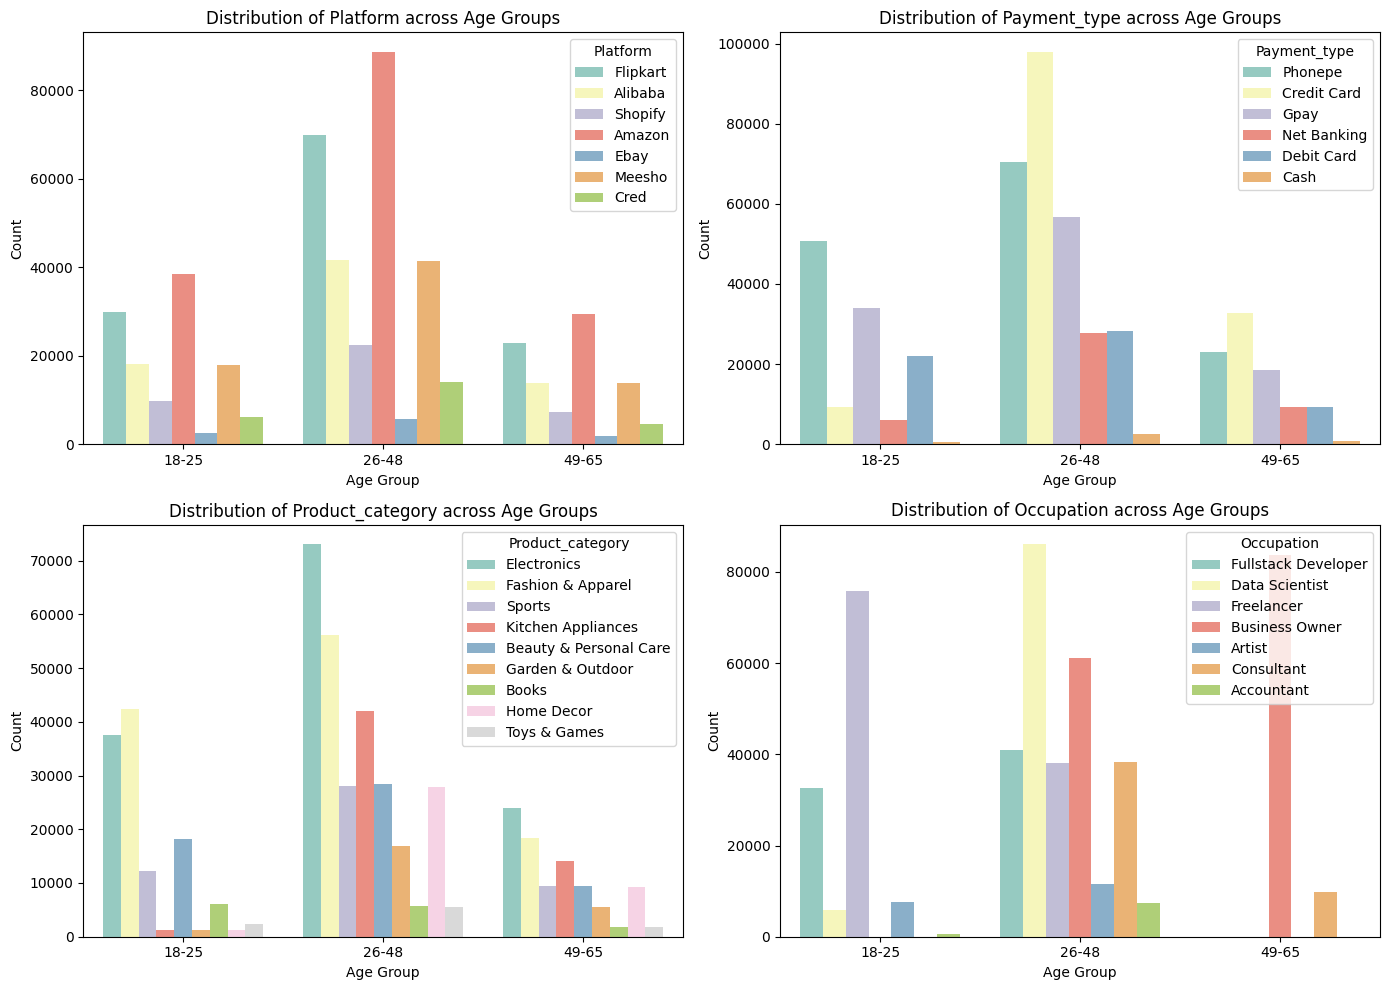

In [ ]:
# visualizing plaform, payment type, product category, occupation distribuion accorss age group
categorical_columns = ['platform', 'payment_type', 'product_category', 'occupation']  # example
plt.figure(figsize=(14, 10))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x='age_group', hue=col, data=df_trans_merged, palette='Set3')
    plt.title(f'Distribution of {col.capitalize()} across Age Groups')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.legend(title=col.capitalize(), loc='upper right')

plt.tight_layout()
plt.show()

Furhter analysis of age group

In [ ]:
# Group the data by age group and calculate the average credit limit and credit score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics[['annual_income', 'credit_limit', 'credit_score']] = age_group_metrics[['annual_income', 'credit_limit', 'credit_score']].astype(int)
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37091,1130,484
1,26-48,145869,20595,597
2,49-65,260165,41699,701


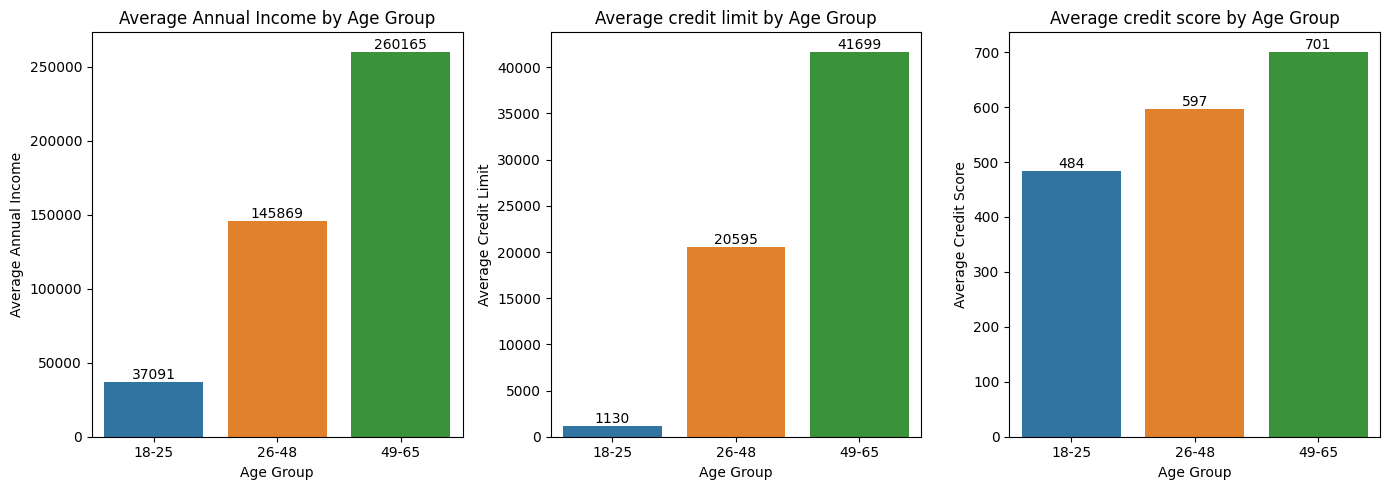

In [ ]:
# create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

# plot 1: average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)
ax1.bar_label(ax1.containers[0], fmt='%.0f', padding=0)
ax1.bar_label(ax1.containers[1], fmt='%.0f', padding=0)
ax1.bar_label(ax1.containers[2], fmt='%.0f', padding=0)

# plot 2: average credit_limit by age group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='tab10', ax=ax2)
ax2.set_title('Average credit limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)
ax2.bar_label(ax2.containers[0], fmt='%.0f', padding=0)
ax2.bar_label(ax2.containers[1], fmt='%.0f', padding=0)
ax2.bar_label(ax2.containers[2], fmt='%.0f', padding=0)

# plot 3: average credit score by age group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='tab10', ax=ax3)
ax3.set_title('Average credit score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)
ax3.bar_label(ax3.containers[0], fmt='%.0f', padding=0)
ax3.bar_label(ax3.containers[1], fmt='%.0f', padding=0)
ax3.bar_label(ax3.containers[2], fmt='%.0f', padding=0)


plt.tight_layout()
plt.show()

further analysis on age group 18-25

In [ ]:
# Filter for age group 18-25
df_18_25 = df_trans_merged[df_trans_merged['age_group'] == '18-25']

# List of categorical columns to analyze
categorical_cols = ['product_category', 'payment_type', 'platform', 'occupation']

# Calculate percentage distribution for each categorical column
for col in categorical_cols:
    print(f"\nPercentage distribution for '{col}' (Age group 18-25):")
    percent_dist = df_18_25[col].value_counts(normalize=True) * 100
    print(percent_dist.round(2).astype(str) + ' %')


Percentage distribution for 'product_category' (Age group 18-25):
product_category
Fashion & Apparel         34.57 %
Electronics               30.67 %
Beauty & Personal Care    14.81 %
Sports                     10.0 %
Books                      4.96 %
Toys & Games               1.99 %
Kitchen Appliances         1.03 %
Garden & Outdoor            1.0 %
Home Decor                 0.98 %
Name: proportion, dtype: object

Percentage distribution for 'payment_type' (Age group 18-25):
payment_type
Phonepe        41.35 %
Gpay           27.74 %
Debit Card     17.92 %
Credit Card     7.51 %
Net Banking      5.0 %
Cash            0.47 %
Name: proportion, dtype: object

Percentage distribution for 'platform' (Age group 18-25):
platform
Amazon      31.31 %
Flipkart    24.39 %
Alibaba     14.75 %
Meesho      14.67 %
Shopify      7.91 %
Cred         4.94 %
Ebay         2.02 %
Name: proportion, dtype: object

Percentage distribution for 'occupation' (Age group 18-25):
occupation
Freelancer          

## **Finalize the target group**

### *Target Group: Ages 18-25*

- **Payment Preferences:**  
  Unlike other age groups where credit cards are the dominant payment method, for 18-25-year-olds, credit cards rank fourth with only 7.51% usage. Around 70% prefer mobile payment apps such as PhonePe and Google Pay.

- **Possible Reasons:**  
  Lower annual income and credit scores in this age group likely contribute to low credit card usage. This is supported by the fact that 61.9% of this group are freelancers.

- **Purchase Categories:**  
  80% of purchases fall into Fashion & Apparel, Electronics, and Beauty & Personal Care.

- **Preferred Marketplaces:**  
  55% of users shop mainly on Amazon or Flipkart.